<a href="https://colab.research.google.com/github/Ad0ol/Computer-Vision-Techniques-for-Image-Segmentation/blob/master/6_Felzenszwalb_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from skimage.color import rgb2gray
import numpy as np
from matplotlib import pyplot as plt
from skimage.metrics import (adapted_rand_error, variation_of_information) 
from skimage.segmentation import felzenszwalb
from skimage.segmentation import mark_boundaries
from sklearn.cluster import KMeans
import time
from sklearn.cluster import Birch

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


(300, 300, 3)


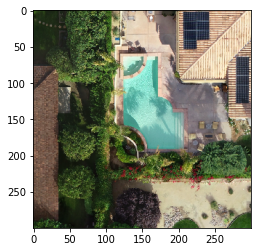

In [0]:
path0 = '/content/gdrive/My Drive/Adal&Norah-Project-CEN546/sample_images/'
path = path0+'image-chips/'
image = plt.imread(path+'1d4fbe33f3_F1BE1D4184INSPIRE-000000.png')
print(image.shape)
plt.imshow(image)

(300, 300, 3)


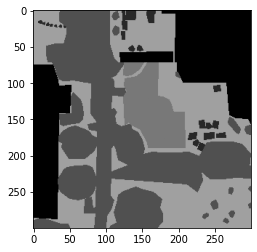

In [0]:
path = path0+'label-chips/'
GT = plt.imread(path+'1d4fbe33f3_F1BE1D4184INSPIRE-000000.png')
print(GT.shape)
plt.imshow(GT*40)


# (075, 025, 230) : BUILDING
# (180, 030, 145) : CLUTTER
# (075, 180, 060) : VEGETATION
# (048, 130, 245) : WATER
# (255, 255, 255) : GROUND


In [0]:
#image_segmented = felzenszwalb(image, scale=100, sigma=0.5, min_size=50)
image_segmented = felzenszwalb(image, scale=100, sigma=1.5, min_size=50)

num_of_segements = np.max(image_segmented) +1

curr_segement = 100
mean_colors_all_segments = np.zeros(( num_of_segements   ,  3))
for curr_segement in range(num_of_segements):
   
    indeces = image_segmented==curr_segement
    pixels_in_segment  = image[indeces]
    mean_color = np.mean(pixels_in_segment , axis=0)
   
    mean_colors_all_segments[curr_segement , :] = mean_color

Birch model as the final step took 0.01 seconds
n_clusters : 4
(195,)
number of estimated clusters : 4


Text(0.5, 1.0, 'Felzenszwalb Segmentation Result')

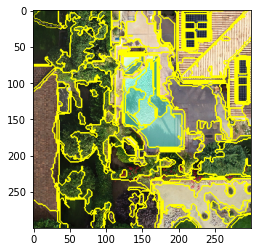

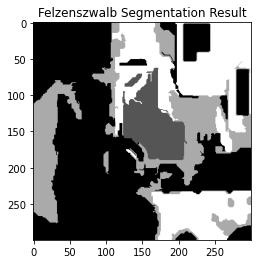

In [0]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(mean_colors_all_segments)
image2show = kmeans.cluster_centers_[kmeans.labels_]

birch_model =    Birch(threshold=0.1, n_clusters=4)
t = time.time()
birch_model.fit(mean_colors_all_segments)
time_ = time.time() - t
print("Birch %s as the final step took %0.2f seconds" % ('model' ,  (time.time() - t)))

# Plot result
labels = birch_model.labels_
centroids = birch_model.subcluster_centers_
n_clusters = np.unique(labels).size
print("n_clusters : %d" % n_clusters)


labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print(labels.shape)
print("number of estimated clusters : %d" % n_clusters_)

img_final_segementation = np.zeros( (  image.shape[0]   , image.shape[1]   )  )
for curr_segement in range(num_of_segements):
    indeces = image_segmented==curr_segement
    cuur_cluster_computed_by_kmeans = labels [ curr_segement ]  
    img_final_segementation[indeces]  =  cuur_cluster_computed_by_kmeans


plt.figure(1)
plt.imshow(mark_boundaries(image, image_segmented))

plt.figure(2)
plt.imshow(img_final_segementation*40, cmap='gray')
plt.title("Felzenszwalb Segmentation Result")

Text(0.5, 1.0, 'Grount Truth')

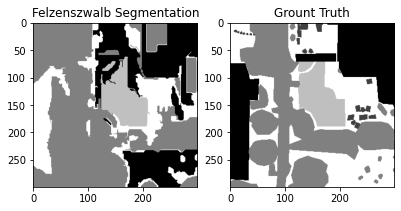

In [0]:
image_segmented_new = np.zeros(img_final_segementation.shape)
idx = img_final_segementation==0
image_segmented_new[idx] = 2
idx = img_final_segementation==1
image_segmented_new[idx] = 3
idx = img_final_segementation==2
image_segmented_new[idx] = 2
idx = img_final_segementation==3
image_segmented_new[idx] = 0
idx = img_final_segementation==2
image_segmented_new[idx] = 4

image_segmented_new = image_segmented_new.astype(int)
fig1 = plt.figure(figsize=(10,20))  # create a figure object
ax = fig1.add_subplot(1, 3, 1)  # create an axes object in the figure
ax.imshow(image_segmented_new*40 , cmap='gray')
plt.title("Felzenszwalb Segmentation")
#plt.imshow((image_segmented_new==1)*200)
ax = fig1.add_subplot(1, 3, 2)  # create an axes object in the figure
ax.imshow(GT[:,:,0]*40  , cmap='gray')
plt.title("Grount Truth")
# BUILDING:0, CLUTTER:1 , VEGETATION:2, WATER:3, GROUND:4, CAR:5, IGNORE:6

In [0]:

Grount_truth_img = rgb2gray(GT)
print(np.unique(Grount_truth_img))

Grount_truth_pixcels=np.around(Grount_truth_img*1000,decimals=0)

Grount_truth_pixcelsInt=Grount_truth_pixcels.astype(int)
print(np.unique(Grount_truth_pixcelsInt))
print(Grount_truth_pixcelsInt.shape)

[0.         0.00392157 0.00784314 0.01176471 0.01568628]
[ 0  4  8 12 16]
(300, 300)


90000
300
[0 1 2 3 4]
[0 2 3 4]
(300, 300)


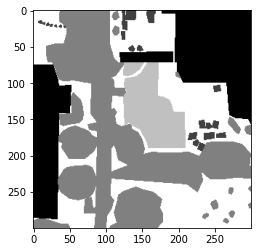

In [0]:
Grount_truth_img_Test = Grount_truth_pixcelsInt.copy()
Grount_truth_img_Test = Grount_truth_pixcelsInt.reshape(Grount_truth_pixcelsInt.shape[0]*Grount_truth_pixcelsInt.shape[1])
for i in range(Grount_truth_img_Test.shape[0]):
    if Grount_truth_img_Test[i] == 0:
        Grount_truth_img_Test[i] = 0  
    elif Grount_truth_img_Test[i] == 4:
        Grount_truth_img_Test[i] = 1 
    elif Grount_truth_img_Test[i] == 8:  
        Grount_truth_img_Test[i] = 2  
    elif Grount_truth_img_Test[i] == 12:  
        Grount_truth_img_Test[i] = 3  
    elif Grount_truth_img_Test[i] == 16:  
        Grount_truth_img_Test[i] = 4  

print (Grount_truth_img_Test.shape[0])    
Grount_truth_pixcelsInt = Grount_truth_img_Test.reshape(Grount_truth_pixcelsInt.shape[0],Grount_truth_pixcelsInt.shape[1])
print (Grount_truth_pixcelsInt.shape[0])    

print(np.unique(Grount_truth_pixcelsInt))
gray_rInt=image_segmented_new.astype(int)

print(np.unique(gray_rInt))
print(gray_rInt.shape)
plt.imshow(Grount_truth_pixcelsInt, cmap='gray')


In [0]:
error, precision, recall = adapted_rand_error(Grount_truth_pixcelsInt, gray_rInt)
print("Error: " , error*100)
print("Precision: " , precision*100)
print("Recall: " , recall*100)
splits, merges = variation_of_information(Grount_truth_pixcelsInt, gray_rInt)

def Cal_accuracy(classification_scores, true_labels):
    classification_scoresC = classification_scores.copy()
    classification_scoresC = classification_scores.reshape(classification_scores.shape[0]*classification_scores.shape[1])
    true_labelsC = true_labels.copy()
    true_labelsC = true_labels.reshape(true_labels.shape[0]*true_labels.shape[1])
        
    num_correct = 0
    for i in range(len(classification_scoresC)):
        if classification_scoresC[i] == true_labelsC[i]:
            num_correct += 1
    return num_correct / len(true_labelsC)

ACC=Cal_accuracy(Grount_truth_pixcelsInt, gray_rInt)
print("Pixel Accuracy: ", ACC*100)

Error:  41.914920592005856
Precision:  56.44676815766343
Recall:  59.82133407452059
Pixel Accuracy:  54.845555555555556
